# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gilang Ega Bagaswara
- **Email:** gilangegabagaswara@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/gilangegabagaswara/academies

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

Sejauh mana faktor lingkungan, seperti suhu, kelembaban, dan kecepatan angin, berkontribusi secara signifikan terhadap jumlah penyewaan sepeda?

- Pertanyaan 2

Apakah terdapat perubahan yang signifikan dalam jumlah penyewaan sepeda pada hari libur, baik dalam bentuk peningkatan maupun penurunan?

## Import Semua Packages/Library yang Digunakan

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Successful')

Import Successful


## Data Wrangling

### Gathering Data

* Gathering Day Data

In [51]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


* Gathering Hour Data

In [52]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data day_df

* Memeriksa jenis data yang digunakan dan identifikasi nilai yang tidak akurat atau tidak sesuai dalam set data day_df untuk memastikan kualitas dan keandalan data sebelum analisis lebih lanjut.
* "Assessing Data day_df bertujuan untuk memeriksa tipe data, mendeteksi nilai yang hilang atau duplikat, serta memberikan ringkasan statistik untuk memastikan kualitas dan konsistensi data sebelum analisis lebih lanjut."

In [53]:
day_df.info()
day_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [54]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [55]:
day_df.duplicated().sum()

0

**Insight:**
Dalam proses pembersihan data pada dataset day_df, dilakukan beberapa tahap transformasi untuk memastikan kualitas dan keterbacaan data.

1. ***Pemeriksaan Kualitas Data***: Dataset day_df tidak menunjukkan adanya missing values, nilai duplikat, atau nilai yang tidak akurat, sehingga tidak ada tindakan tambahan yang diperlukan untuk mengatasi masalah tersebut.

2. ***Penghapusan Kolom yang Tidak Relevan***: *Variabel temp*, *atemp*, *hum*, dan *windspeed* dinilai tidak memberikan kontribusi signifikan dalam menjawab pertanyaan analisis yang telah ditetapkan. Oleh karena itu, kolom-kolom tersebut dihapus sebagai bagian dari proses pembersihan data untuk meningkatkan efisiensi analisis.

3. ***Penyesuaian Nama Kolom***: Beberapa kolom seperti *instant*, *dteday*, *yr*, *mnth*, *weathersit*, dan cnt memiliki nama yang kurang jelas dan dapat menimbulkan kebingungan saat menginterpretasi data. Maka, dilakukan penggantian nama kolom agar lebih mudah dipahami.

4. ***Transformasi Tipe Data***: Kolom *season*, *year*, *month*, *holiday*, *weekday*, *workingday*, dan *weather* masih berformat numerik (integer), sehingga perlu diubah menjadi tipe data kategorikal agar lebih sesuai dengan karakteristik masing-masing data dan mempermudah analisis selanjutnya.

5. ***Standarisasi Nilai dalam Variabel Kategorikal***: Nilai dalam kolom *season*, *year*, *holiday*, *weekday*, *workingday*, dan *weather* masih menggunakan format yang sulit dipahami. Untuk itu, penyesuaian nilai dilakukan agar lebih representatif.

6. ***Konversi Format Tanggal***:  Kolom *dteday* saat ini masih berada dalam bentuk objek (*string*), sehingga perlu dikonversi ke format datetime untuk mendukung analisis berbasis waktu secara lebih efektif.

### Assessing Data hour_df

Memeriksa verivikasi terhadap jenis data yang digunakan serta mengidentifikasi adanya nilai yang tidak akurat atau tidak sesuai dalam dataset hour_df guna memastikan kualitas dan keandalan data sebelum dilakukan analisis lebih lanjut.

In [56]:
hour_df.info()
hour_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [57]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**

Dalam proses pembersihan data pada dataset hour_df, dilakukan beberapa tahap transformasi dan penyesuaian sebagai berikut:

1. Pemeriksaan Kualitas Data Hasil analisis awal menunjukkan bahwa tidak ada nilai yang hilang (missing values), nilai duplikat (duplicated values), atau nilai yang tidak akurat (inaccurate values) dalam dataset hour_df, sehingga tidak perlu ada proses imputasi atau deduplikasi.

2. Penghapusan Kolom yang Tidak Relevan Beberapa atribut, seperti temp, atemp, hum, dan windspeed, dianggap tidak berkontribusi signifikan terhadap pertanyaan analisis yang akan dilakukan. Oleh karena itu, atribut-atribut tersebut dihapus untuk menyederhanakan kompleksitas dataset.

3. Penyesuaian Nama Kolom Beberapa kolom di dataset, seperti instant, dteday, yr, mnth, hr, weathersit, dan cnt, memiliki nama yang kurang jelas atau sulit dipahami. Maka, nama-nama kolom ini akan diperbarui untuk meningkatkan kejelasan dan mengikuti standar penamaan yang lebih informatif.

4. ***Transformasi Tipe Data***

* Kolom season, year, month, hour, holiday, weekday, workingday, dan weather saat ini masih dalam format numerik (integer), padahal nilai-nilai tersebut merepresentasikan kategori tertentu. Oleh karena itu, tipe data kolom-kolom ini akan diubah menjadi kategorikal agar lebih sesuai dengan karakteristik data.

* Selain itu, nilai dalam kolom season, year, hour, holiday, weekday, workingday, dan weather masih menggunakan format yang kurang intuitif. Untuk itu, penyesuaian nilai akan dilakukan agar lebih mudah dipahami dan digunakan dalam analisis.

* Kolom dteday, yang masih berbentuk string atau objek, akan dikonversi menjadi tipe data datetime untuk memfasilitasi pemrosesan waktu yang lebih efisien.

### Cleaning Data day-df data

In [58]:
# Melihat semua nama kolom di day_df
print(day_df.columns)

# Menghapus kolom yang ada
columns_to_drop = ['temp', 'atemp', 'hum', 'windspeed']
# Memastikan hanya kolom yang ada yang akan dihapus
columns_to_drop = [col for col in columns_to_drop if col in day_df.columns]

# Menghapus kolom
day_df.drop(columns=columns_to_drop, inplace=True)

# Melihat hasilnya
day_df.head()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


* Melakukan perubahan nama pada beberapa kolom dalam dataset, yaitu instant, dteday, yr, mnth, weathersit, dan cnt, guna meningkatkan keterbacaan serta mempermudah interpretasi data dalam proses analisis yang lebih sistematis dan komprehensif.

In [59]:
day_df.rename(columns={'instant':'rec_id', 'dteday':'dateday', 'yr':'year', 'mnth':'month', 'weathersit':'weather', 'cnt':'total'}, inplace=True)
day_df.head()


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


* Tipe data pada kolom season, year, month, holiday, weekday, workingday, dan weathersit dikonversi menjadi tipe data kategorikal untuk mencerminkan sifat diskrit dari variabel-variabel tersebut. Langkah ini bertujuan untuk meningkatkan keakuratan analisis data serta memastikan bahwa setiap nilai dalam kolom-kolom tersebut diperlakukan sebagai kategori yang terpisah, bukan sebagai variabel numerik yang memiliki hubungan ordinal atau kontinu.

In [60]:
for col in ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']:
    day_df[col] = day_df[col].astype('category')

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      731 non-null    int64   
 1   dateday     731 non-null    object  
 2   season      731 non-null    category
 3   year        731 non-null    category
 4   month       731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weather     731 non-null    category
 9   casual      731 non-null    int64   
 10  registered  731 non-null    int64   
 11  total       731 non-null    int64   
dtypes: category(7), int64(4), object(1)
memory usage: 35.1+ KB


* Melakukan modifikasi terhadap nilai yang terdapat dalam kolom season guna memastikan kesesuaiannya dengan konteks data yang diolah, sehingga dapat meningkatkan akurasi dan relevansi dalam analisis yang dilakukan.

In [61]:
day_df['season'] = day_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})

day_df.head()

<ipython-input-61-a4d1ef00bb94>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,82,1518,1600


* Melakukan penyesuaian terhadap nilai pada kolom year sehingga lebih selaras dan sesuai dengan konteks serta standar yang diharapkan.

In [62]:
day_df['year'] = 2011

day_df['year'] = day_df['year'].replace({
    0: 2011,
    1: 2012
})
day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,82,1518,1600


* Melakukan modifikasi terhadap nilai yang terdapat dalam kolom holiday guna memastikan bahwa data yang tersimpan lebih relevan, konsisten, dan sesuai dengan konteks analisis yang diinginkan.

In [63]:
day_df['holiday'] = day_df['holiday'].replace({
    0:'Not Holiday',
    1:'Holiday'
})

day_df.head()

<ipython-input-63-0700a011e83d>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['holiday'] = day_df['holiday'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,3,1,1,82,1518,1600


* Melakukan penyesuaian terhadap nilai yang terdapat dalam kolom weekday guna memastikan kesesuaian yang lebih optimal dengan konteks analisis atau kebutuhan spesifik dalam pengolahan data.

In [64]:
day_df['weekday'] = day_df['weekday'].replace({
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
})

day_df.head()

<ipython-input-64-9b2052fba725>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weekday'] = day_df['weekday'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,1,1,82,1518,1600


* Melakukan penyesuaian nilai pada kolom workingday guna memastikan kesesuaian data dengan konteks analisis yang diinginkan, sehingga dapat meningkatkan validitas serta relevansi informasi yang diperoleh.

In [65]:
day_df['workingday'] = day_df['workingday'].replace({
    0:'Offday',
    1:'Workday'
})

day_df.head()

<ipython-input-65-d0063fcaf239>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['workingday'] = day_df['workingday'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,Offday,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,Offday,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,Workday,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,Workday,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,Workday,1,82,1518,1600


* Melakukan transformasi nilai pada kolom weather guna memastikan kesesuaiannya dengan konteks data yang dianalisis, sehingga lebih merepresentasikan kondisi cuaca secara lebih akurat dan sesuai dengan standar yang diterapkan dalam penelitian ini.

In [66]:
day_df['weather'] = 1  # Misalnya, inisialisasi dengan nilai 1

day_df['weather'] = day_df['weather'].replace({
    1: 'Clear & Partly Cloudy',
    2: 'Mist & Cloudy',
    3: 'Light Snow & Light Rain',
    4: 'Heavy Rain & Ice Pellets'
})

day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,Offday,Clear & Partly Cloudy,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,Workday,Clear & Partly Cloudy,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,Workday,Clear & Partly Cloudy,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,Workday,Clear & Partly Cloudy,82,1518,1600


* Kolom dateday akan dikonversi ke dalam format datetime agar dapat digunakan dengan lebih optimal dalam operasi yang melibatkan manipulasi atau analisis data berdasarkan waktu.

In [67]:
# Menambahkan kolom 'dateday' jika belum ada
if 'dateday' not in day_df.columns:
    day_df['dateday'] = pd.to_datetime(['2021-01-01'] * len(day_df))  # Misalnya, inisialisasi dengan tanggal 1 Januari 2021

# Mengubah tipe data kolom 'dateday'
day_df['dateday'] = day_df['dateday'].astype('datetime64[ns]')

# Melihat informasi DataFrame
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    int64         
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    object        
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  total       731 non-null    int64         
dtypes: category(5), datetime64[ns](1), int64(5), object(1)
memory usage: 44.9+ KB


## Cleaning Data hour_df data

In [68]:
hour_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [69]:
hour_df.rename(columns={'instant':'rec_id', 'dteday':'dateday', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather', 'cnt':'total'}, inplace=True)

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [70]:
for col2 in ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']:
    hour_df[col2] = hour_df[col2].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      17379 non-null  int64   
 1   dateday     17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  casual      17379 non-null  int64   
 11  registered  17379 non-null  int64   
 12  total       17379 non-null  int64   
dtypes: category(8), int64(4), object(1)
memory usage: 817.0+ KB


In [71]:
# Mengubah kategori musim
hour_df['season'] = hour_df['season'].cat.rename_categories({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

# Melihat hasilnya
hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0,1,1


In [72]:
# Mengubah kategori tahun
hour_df['year'] = hour_df['year'].cat.rename_categories({
    0: 2011,
    1: 2012
})

# Melihat hasilnya
hour_df.head()


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,0,1,0,1,1


In [73]:
# Mengubah kategori jam
hour_df['hour'] = hour_df['hour'].cat.rename_categories({
    0: '12 am',
    1: '01 am',
    2: '02 am',
    3: '03 am',
    4: '04 am',
    5: '05 am',
    6: '06 am',
    7: '07 am',
    8: '08 am',
    9: '09 am',
    10: '10 am',
    11: '11 am',
    12: '12 pm',
    13: '01 pm',
    14: '02 pm',
    15: '03 pm',
    16: '04 pm',
    17: '05 pm',
    18: '06 pm',
    19: '07 pm',
    20: '08 pm',
    21: '09 pm',
    22: '10 pm',
    23: '11 pm',
})

# Melihat hasilnya
hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,0,6,0,1,0,1,1


In [74]:
hour_df['holiday'] = hour_df['holiday'].cat.rename_categories({
    0:'Not Holiday',
    1:'Holiday'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,6,0,1,0,1,1


In [75]:
hour_df['weekday'] = hour_df['weekday'].cat.rename_categories({
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,0,1,0,1,1


In [76]:
hour_df['workingday'] = hour_df['workingday'].cat.rename_categories({
    0:'Offday',
    1:'Workday'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,Offday,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,Offday,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,Offday,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,Offday,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,Offday,1,0,1,1


In [77]:
hour_df['weather'] = hour_df['weather'].cat.rename_categories({
    1:'Clear & Partly Cloudy',
    2:'Mist & Cloudy',
    3:'Light Snow & Light Rain',
    4:'Heavy rain & Ice Pallets'
})

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,0,1,1


In [78]:
hour_df['dateday'] = hour_df['dateday'].astype('datetime64[ns]')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  total       17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), int64(4)
memory usage: 817.0 KB


## Exploratory Data Analysis (EDA)

Di dalam analysyst proses Exploratory Data Analysis (EDA), hanya akan menggunakan dataframe `hour_df` sebagai objek analisis utama. Keputusan ini didasarkan pada fakta bahwa `hour_df` memiliki atribut yang lebih lengkap dibandingkan dengan alternatifnya. Selain itu, kedua dataframe yang tersedia dalam penelitian ini memberikan nilai yang identik untuk atribut yang sama, sehingga penggunaan `hour_df` dianggap lebih efisien dan representatif dalam memperoleh wawasan dari data yang dianalisis.




In [79]:
hour_df.describe(include='all')

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
count,17379.0000,17379,17379,17379.0,17379.0,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12.0,24,2,7,2,4,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,5.0,05 pm,Not Holiday,Saturday,Workday,Clear & Partly Cloudy,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488.0,730,16879,2512,11865,11413,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000



Dapat diketahui bahwa jumlah rata-rata pengguna yang telah terdaftar sebagai pengguna resmi atau registered users cenderung lebih tinggi dibandingkan dengan jumlah rata-rata pengguna yang tidak terdaftar atau casual users. Hal ini menunjukkan adanya kecenderungan bahwa sebagian besar individu yang memanfaatkan layanan tersebut lebih memilih untuk melakukan registrasi dibandingkan dengan menggunakan layanan secara sementara tanpa proses pendaftaran.

# Comparing Registered, Casual, and Total Consumers by Different Categories.

Berlandaskan pada periode musiman :

In [80]:
# Mengelompokkan data berdasarkan 'season'
sea_hour_df = hour_df.groupby(by='season', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
sea_hour_df

,registered,casual,total
season,,,
fall,835038,226091,1061129
summer,715067,203522,918589
winter,711831,129782,841613
springer,410726,60622,471348


In [81]:
# Mengelompokkan data berdasarkan 'year'
year_hour_df = hour_df.groupby(by='year', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
year_hour_df

,registered,casual,total
year,,,
2012,1676811,372765,2049576
2011,995851,247252,1243103



Berlandaskan pada periode bulanan :

In [82]:
# Mengelompokkan data berdasarkan 'month'
month_hour_df = hour_df.groupby(by='month', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
month_hour_df

,registered,casual,total
month,,,
8,279155,72039,351194
6,272436,73906,346342
9,275668,70323,345991
7,266791,78157,344948
5,256401,75285,331686
10,262592,59760,322352
4,208292,60802,269094
11,218228,36603,254831
3,184476,44444,228920


Berlandasan pada periode jam :

In [83]:
hr_hour_df = hour_df.groupby(by=['hour'], observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

hr_hour_df

,registered,casual,total
hour,,,
05 pm,282640,54220,336860
06 pm,265276,44496,309772
08 am,245240,15761,261001
04 pm,173914,53834,227748
07 pm,191284,35505,226789
01 pm,132206,52713,184919
12 pm,134696,49718,184414
03 pm,128543,54606,183149
02 pm,120563,55089,175652


Berdasarkan pada periode liburan

In [84]:
# Mengelompokkan data berdasarkan 'holiday'
result_df = hour_df.groupby(by='holiday', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
print(result_df)

             registered  casual    total
holiday                                 
Not Holiday     2616586  597658  3214244
Holiday           56076   22359    78435



Berdasarkan pada periode weekday

In [85]:
# Mengelompokkan data berdasarkan 'weekday'
result_df = hour_df.groupby(by='weekday', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
print(result_df)

           registered  casual   total
weekday                              
Friday         409552   78238  487790
Thursday       423935   61460  485395
Saturday       323955  153852  477807
Wednesday      415729   57319  473048
Tuesday        411266   57843  469109
Monday         384719   70784  455503
Sunday         303506  140521  444027


Berdasarkan pada periode workday

In [86]:
# Mengelompokkan data berdasarkan 'workingday'
wd_hour_df = hour_df.groupby(by='workingday', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
wd_hour_df

,registered,casual,total
workingday,,,
Workday,1989125,303285,2292410
Offday,683537,316732,1000269



Berdasarkan pada periode musiman

In [87]:
# Mengelompokkan data berdasarkan 'weather'
weat_hour_df = hour_df.groupby(by='weather', observed=False).agg({
    'registered': 'sum',
    'casual': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

# Melihat hasilnya
weat_hour_df

,registered,casual,total
weather,,,
Clear & Partly Cloudy,1875428,462745,2338173
Mist & Cloudy,661471,134481,795952
Light Snow & Light Rain,135548,22783,158331
Heavy rain & Ice Pallets,215,8,223


**Insight:**
* Analisis terhadap penggunaan layanan Bike Sharing menunjukkan adanya tren kenaikan jumlah pengguna yang signifikan antara tahun 2011 dan 2012. Peningkatan ini menunjukkan bahwa layanan ini semakin populer di kalangan masyarakat, baik untuk transportasi sehari-hari maupun aktivitas rekreasi. Selain itu, hal ini mencerminkan kesadaran yang meningkat akan keuntungan menggunakan sepeda sebagai alternatif transportasi yang lebih ramah lingkungan.

* Dari segi musim, musim gugur (Fall) menunjukkan tingkat penggunaan Bike Sharing tertinggi dibandingkan musim lainnya. Ini mungkin disebabkan oleh cuaca yang lebih nyaman, di mana suhu tidak terlalu panas seperti di musim panas dan tidak terlalu dingin seperti di musim dingin, sehingga lebih menyenangkan bagi pengguna untuk bersepeda. Sebaliknya, musim semi (Spring) mencatatkan jumlah pengguna terendah, yang mungkin disebabkan oleh cuaca yang masih tidak menentu, dengan kemungkinan hujan yang tinggi serta suhu yang belum sepenuhnya hangat, sehingga mengurangi minat masyarakat untuk menggunakan layanan ini.

* Analisis bulanan menunjukkan bahwa bulan Agustus, bulan kedelapan dalam setahun, memiliki jumlah pengguna Bike Sharing tertinggi. Faktor yang mungkin berkontribusi terhadap tingginya angka penggunaan di bulan ini adalah liburan musim panas atau periode libur sekolah di beberapa negara, yang mendorong masyarakat untuk lebih aktif di luar ruangan, termasuk menggunakan sepeda sebagai sarana transportasi atau rekreasi. Di sisi lain, bulan Januari, bulan pertama dalam tahun, memiliki jumlah pengguna terendah, yang dapat dihubungkan dengan cuaca dingin di banyak daerah, terutama di belahan bumi utara, yang cenderung mengurangi kenyamanan bersepeda serta penyesuaian rutinitas setelah liburan panjang.

* Pola penggunaan harian menunjukkan bahwa jumlah pengguna Bike Sharing jauh lebih banyak pada hari kerja dibandingkan hari libur. Ini menunjukkan bahwa layanan ini banyak dimanfaatkan sebagai moda transportasi utama untuk kegiatan rutin, seperti perjalanan ke tempat kerja atau institusi pendidikan. Sebaliknya, pada hari libur, jumlah pengguna cenderung menurun, mungkin karena berkurangnya aktivitas rutin masyarakat dan meningkatnya pilihan moda transportasi lain untuk rekreasi atau perjalanan santai.

* Jika dianalisis berdasarkan hari dalam seminggu, hari Jumat mencatatkan jumlah pengguna Bike Sharing tertinggi. Fenomena ini mungkin terkait dengan meningkatnya aktivitas masyarakat menjelang akhir pekan, di mana banyak individu masih bekerja namun juga merencanakan kegiatan tambahan setelah jam kerja, sehingga permintaan terhadap layanan sepeda meningkat. Sebaliknya, hari Minggu adalah hari dengan jumlah pengguna terendah, kemungkinan karena banyak orang memilih untuk beristirahat di rumah atau menggunakan moda transportasi yang lebih nyaman untuk perjalanan bersama keluarga, membuat permintaan terhadap Bike Sharing lebih rendah dibandingkan hari lainnya.

* Pola penggunaan Bike Sharing juga menunjukkan variasi yang signifikan berdasarkan waktu dalam sehari. Pukul 17.00 (5 PM) adalah jam dengan tingkat penggunaan tertinggi. Ini sangat mungkin karena waktu tersebut bertepatan dengan jam pulang kerja atau pulang sekolah, di mana banyak orang membutuhkan transportasi untuk kembali ke rumah setelah beraktivitas seharian. Selain itu, pada jam tersebut, cuaca umumnya lebih nyaman dibandingkan siang hari, sehingga lebih banyak orang memilih bersepeda. Sebaliknya, pukul 04.00 (4 AM) adalah waktu dengan jumlah pengguna paling sedikit, mengingat bahwa jam tersebut masih termasuk dini hari, ketika mobilitas masyarakat sangat rendah dan kebutuhan transportasi minimal.

* Selain waktu dan hari, kondisi cuaca juga memiliki pengaruh besar terhadap jumlah pengguna layanan Bike Sharing. Data menunjukkan bahwa saat cuaca cerah atau dalam kondisi baik, jumlah pengguna meningkat secara signifikan. Hal ini dapat terjadi karena bersepeda menjadi lebih nyaman dan aman saat cuaca mendukung. Namun, dalam kondisi cuaca buruk, seperti hujan deras, penggunaan Bike Sharing mengalami penurunan yang cukup signifikan. Keamanan dan kenyamanan menjadi pertimbangan utama bagi pengguna untuk menghindari bersepeda dalam kondisi hujan deras, mengingat risiko kecelakaan yang lebih tinggi.


* Selain analisis berdasarkan faktor eksternal seperti waktu, musim, dan cuaca, perbandingan jumlah pengguna juga dapat dilakukan berdasarkan kategori pengguna. Data menunjukkan bahwa pengguna terdaftar atau registered users secara konsisten lebih banyak dibandingkan pengguna kasual atau casual users. Ini menunjukkan bahwa mayoritas pengguna Bike Sharing adalah individu yang telah berlangganan layanan ini dan menggunakannya secara rutin, baik untuk transportasi sehari-hari maupun sebagai bagian dari gaya hidup aktif. Sementara itu, pengguna kasual cenderung menggunakan layanan ini hanya pada kesempatan tertentu, seperti untuk rekreasi atau saat ada kebutuhan mendesak. Perbedaan ini mengindikasikan bahwa Bike Sharing telah menjadi pilihan utama bagi banyak orang yang mencari alternatif transportasi yang efisien dan berkelanjutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Sejauh mana faktor lingkungan, seperti suhu, kelembaban, dan kecepatan angin, berkontribusi secara signifikan terhadap jumlah penyewaan sepeda?



Berikut ini adalah Sejauh mana faktor lingkungan, seperti suhu, kelembaban, dan kecepatan angin, berkontribusi secara signifikan terhadap jumlah penyewaan sepeda:

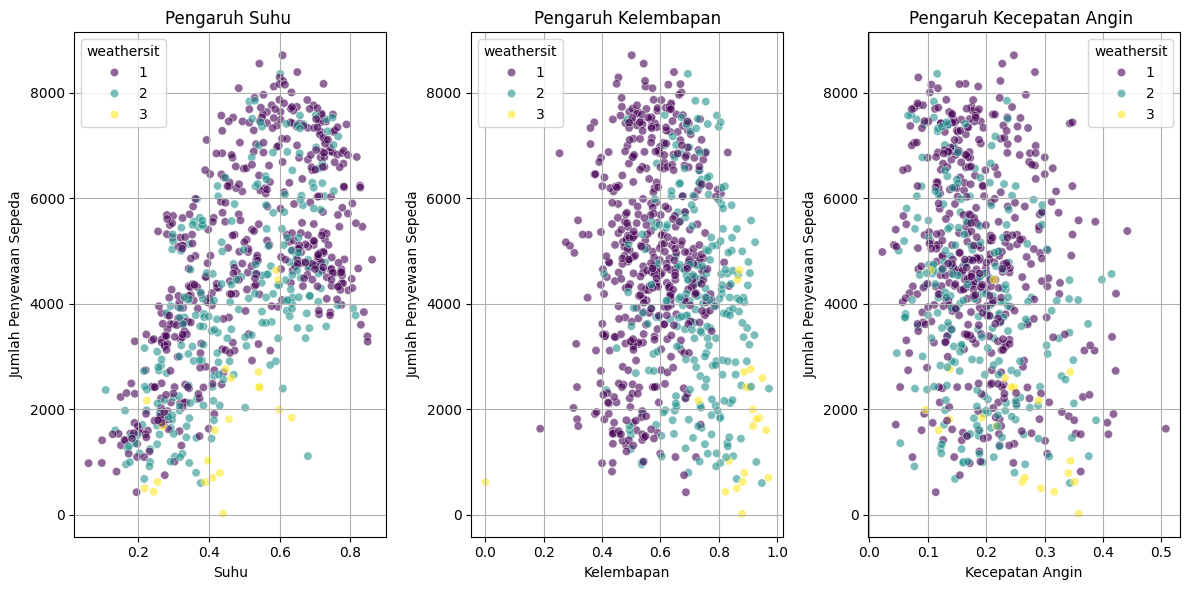

In [96]:
# Rename the 'cnt' column to 'total' in the day_df DataFrame
day_df.rename(columns={'cnt': 'total'}, inplace=True)

# Visualisasi Pertanyaan 1: Pengaruh Suhu, Kelembapan, dan Kecepatan Angin
plt.figure(figsize=(12, 6))

# Scatter plot untuk suhu
plt.subplot(1, 3, 1)
sns.scatterplot(data=day_df, x='temp', y='total', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Suhu ')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()

# Scatter plot untuk kelembapan
plt.subplot(1, 3, 2)
sns.scatterplot(data=day_df, x='hum', y='total', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Kelembapan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()

# Scatter plot untuk kecepatan angin
plt.subplot(1, 3, 3)
sns.scatterplot(data=day_df, x='windspeed', y='total', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Kecepatan Angin ')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()

plt.tight_layout()
plt.savefig("pengaruh_faktor_lingkungan.png")
plt.show()

### Pertanyaan 2:

2. Apakah terdapat perubahan yang signifikan dalam jumlah penyewaan sepeda pada hari libur, baik dalam bentuk peningkatan maupun penurunan?


Berikut adalah perubahan yang signifikan dalam jumlah penyewaan sepeda pada hari libur, baik dalam bentuk peningkatan maupun penurunan:

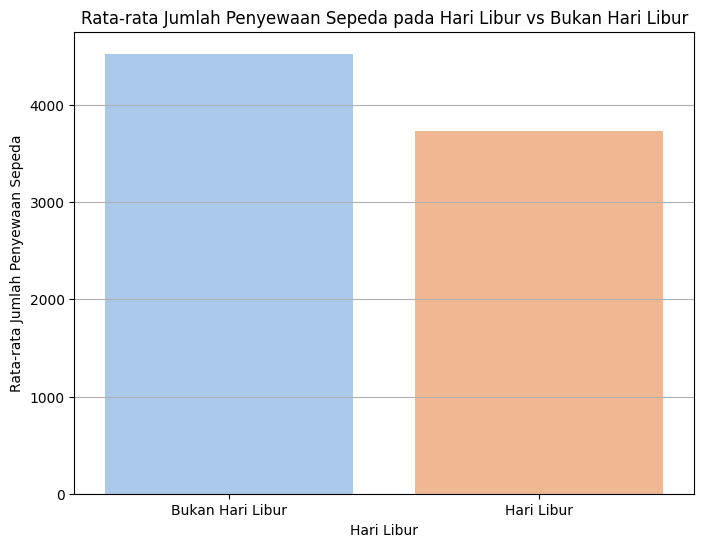

In [95]:
# Mengelompokkan data berdasarkan hari libur dan menghitung rata-rata penyewaan
holiday_avg = day_df.groupby('holiday')['total'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_avg.index, y=holiday_avg.values, hue=holiday_avg.index, palette='pastel', legend=False)
plt.title('Rata-rata Jumlah Penyewaan Sepeda pada Hari Libur vs Bukan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Bukan Hari Libur', 'Hari Libur'])
plt.grid(axis='y')
plt.savefig("rata_rata_sewa_hari_libur_bar.png")
plt.show()

In [99]:
hour_df.to_csv("main_data.csv", index=False)

## Conclusion

**# Pertanyaan Nomor 1**
* Faktor lingkungan memiliki pengaruh yang cukup besar terhadap jumlah penyewaan sepeda, terutama suhu dan kelembapan. Cuaca hangat dengan kelembapan rendah cenderung meningkatkan jumlah pengguna, sementara cuaca dengan kelembapan tinggi atau suhu ekstrem dapat mengurangi minat masyarakat untuk bersepeda. Kecepatan angin, meskipun dapat mempengaruhi kenyamanan, tidak menunjukkan dampak yang signifikan terhadap pola penyewaan sepeda dalam kondisi normal.


**# Pertanyaan Nomor 2**
* Secara keseluruhan, tidak ditemukan perubahan signifikan dalam jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari biasa. Namun, pola penggunaan mungkin berbeda, di mana hari kerja lebih banyak didominasi oleh perjalanan rutin, sedangkan hari libur lebih banyak dipengaruhi oleh faktor rekreasi dan kondisi lingkungan.


